This project aims to predict future stock prices using advanced analytical methods. The endogenous variable is the APPL stock price, while the exogenous variables includes varios economic factor such as GDP, unemployement rate, Maturity Yield of US treasury Bond, Personal Saving Rate USA and market indicators like Mircosoft, Samsung and S&P500 Stock Price. The approach involves:

Regression Models: To establish predictive relationships between the stock price and other variables.

Principal Component Analysis (PCA): To reduce dimensionality and identify key components.

Factor Analysis: To uncover underlying factors influencing the stock price.

Correlation Analysis: To assess the strength and direction of relationships among variables.

Multicollinearity Checks: To evaluate and address the intercorrelations among predictors.

These methodologies will be employed to develop a robust model for forecasting future stock prices based on comprehensive data analysis.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
def datas(filename):
    df = pd.read_csv(filename)
    df.set_index("Date", inplace=True)
    return df

df = datas("Datasets/Historical Data - 2000-2024.csv")
df.head()

,Samsung,Apple,Microsoft,SnP500,Personal Saving,Maturity Yield,UR_Rate
Date,,,,,,,
1/1/2000,4.3800,0.926339,48.93750,1394.5,324.2,6.862500,4.0
2/1/2000,3.7376,1.023438,44.68750,1366.4,289.4,6.539000,4.1
3/1/2000,4.8910,1.212612,53.12500,1498.6,276.5,6.380435,4.0
4/1/2000,4.3800,1.107701,34.87500,1452.4,311.7,6.184737,3.8
5/1/2000,4.4968,0.750000,31.28125,1420.6,314.7,6.548182,4.0


In [112]:
GDP = datas("Datasets/GDP.csv")
GDP.head()

,GDP
Date,
1/1/2000,10002.179
4/1/2000,10247.720
7/1/2000,10318.165
10/1/2000,10435.744
1/1/2001,10470.231


Linear Interpolation of the GDP of NAN Values

$y = y_0 + \frac{(x - x_0) \cdot (y_1 - y_0)}{x_1 - x_0}$


$y$ is the interpolated value at $x$. 

$x_0$ and $x_1$ are the known x-values. 

$y_0$ and $y_1$ are the known y-values corresponding to $x_0$ and $x_1$

In [113]:
df = pd.concat([df, GDP], axis = 1)

df['GDP'] = df['GDP'].interpolate(method='linear', limit_direction='both')
df.head()

,Samsung,Apple,Microsoft,SnP500,Personal Saving,Maturity Yield,UR_Rate,GDP
Date,,,,,,,,
1/1/2000,4.3800,0.926339,48.93750,1394.5,324.2,6.862500,4.0,10002.179000
2/1/2000,3.7376,1.023438,44.68750,1366.4,289.4,6.539000,4.1,10084.026000
3/1/2000,4.8910,1.212612,53.12500,1498.6,276.5,6.380435,4.0,10165.873000
4/1/2000,4.3800,1.107701,34.87500,1452.4,311.7,6.184737,3.8,10247.720000
5/1/2000,4.4968,0.750000,31.28125,1420.6,314.7,6.548182,4.0,10271.201667


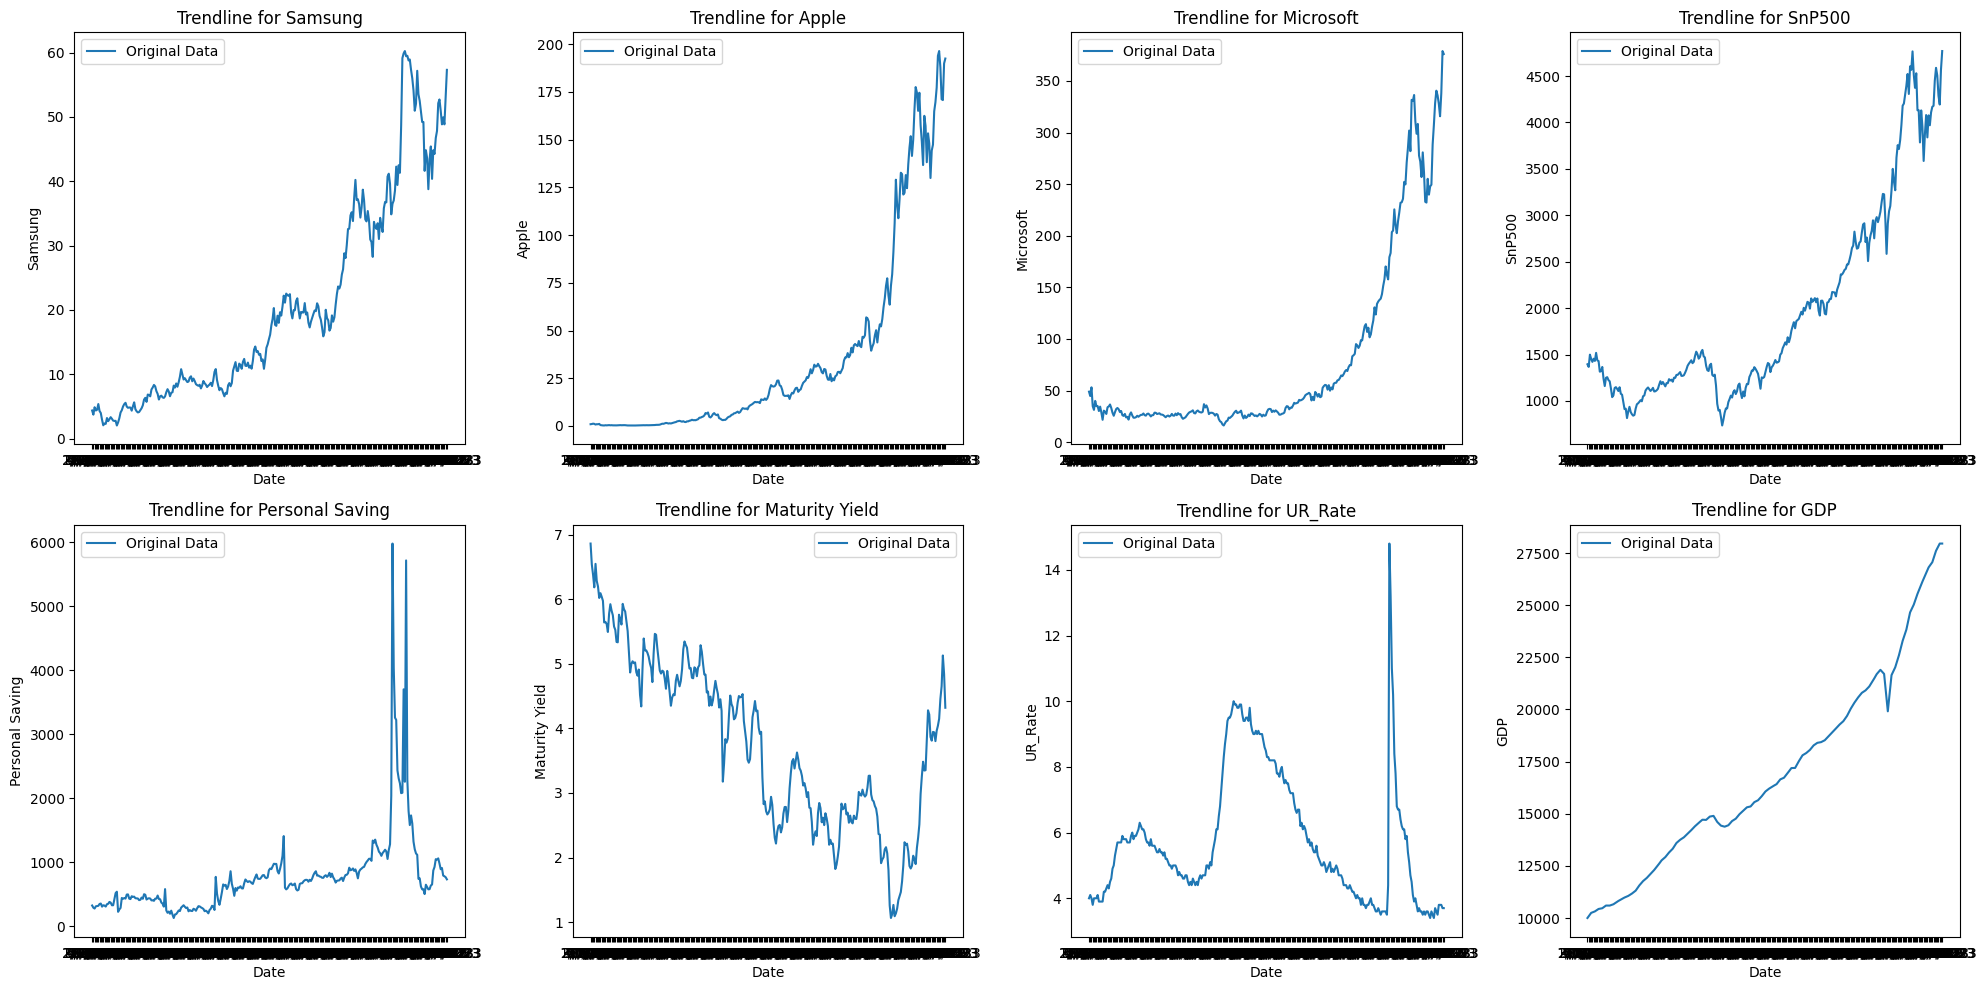

In [114]:
num_columns = len(df.columns)
num_plots_per_row = 4
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.lineplot(ax=axes[i], x=df.index, y=df[column], label='Original Data')
    axes[i].set_title(f'Trendline for {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [115]:
df = df.pct_change()
df = df.dropna()
df.head()

,Samsung,Apple,Microsoft,SnP500,Personal Saving,Maturity Yield,UR_Rate,GDP
Date,,,,,,,,
2/1/2000,-0.146667,0.104820,-0.086845,-0.020151,-0.107341,-0.047140,0.025000,0.008183
3/1/2000,0.308594,0.184842,0.188811,0.096751,-0.044575,-0.024249,-0.024390,0.008117
4/1/2000,-0.104478,-0.086517,-0.343529,-0.030829,0.127306,-0.030672,-0.050000,0.008051
5/1/2000,0.026667,-0.322922,-0.103047,-0.021895,0.009625,0.058765,0.052632,0.002291
6/1/2000,0.198052,0.247024,0.278721,0.023934,0.013346,-0.040539,0.000000,0.002286


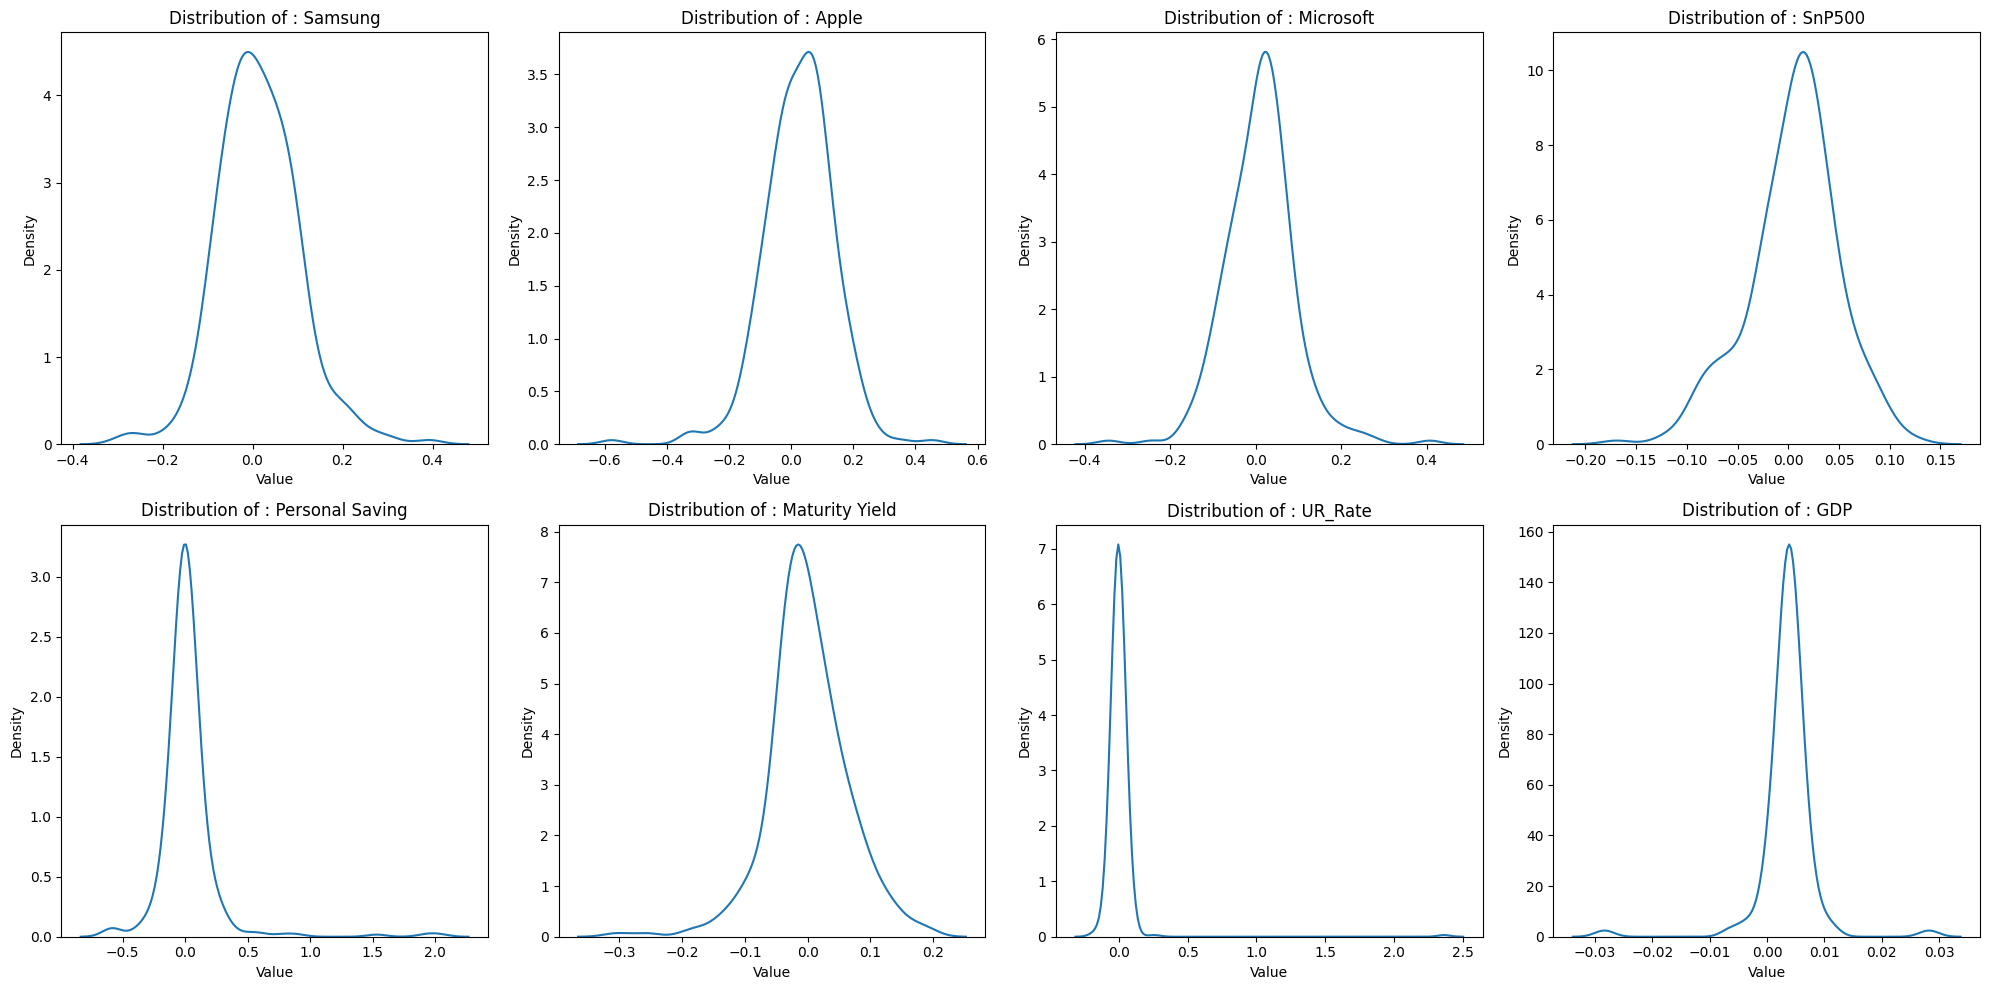

In [116]:
num_columns = len(df.columns)
num_plot_per_row = 4
num_rows = (num_columns + num_plot_per_row -1) // num_plot_per_row
fig, axes = plt.subplots(num_rows, num_plot_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of : {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

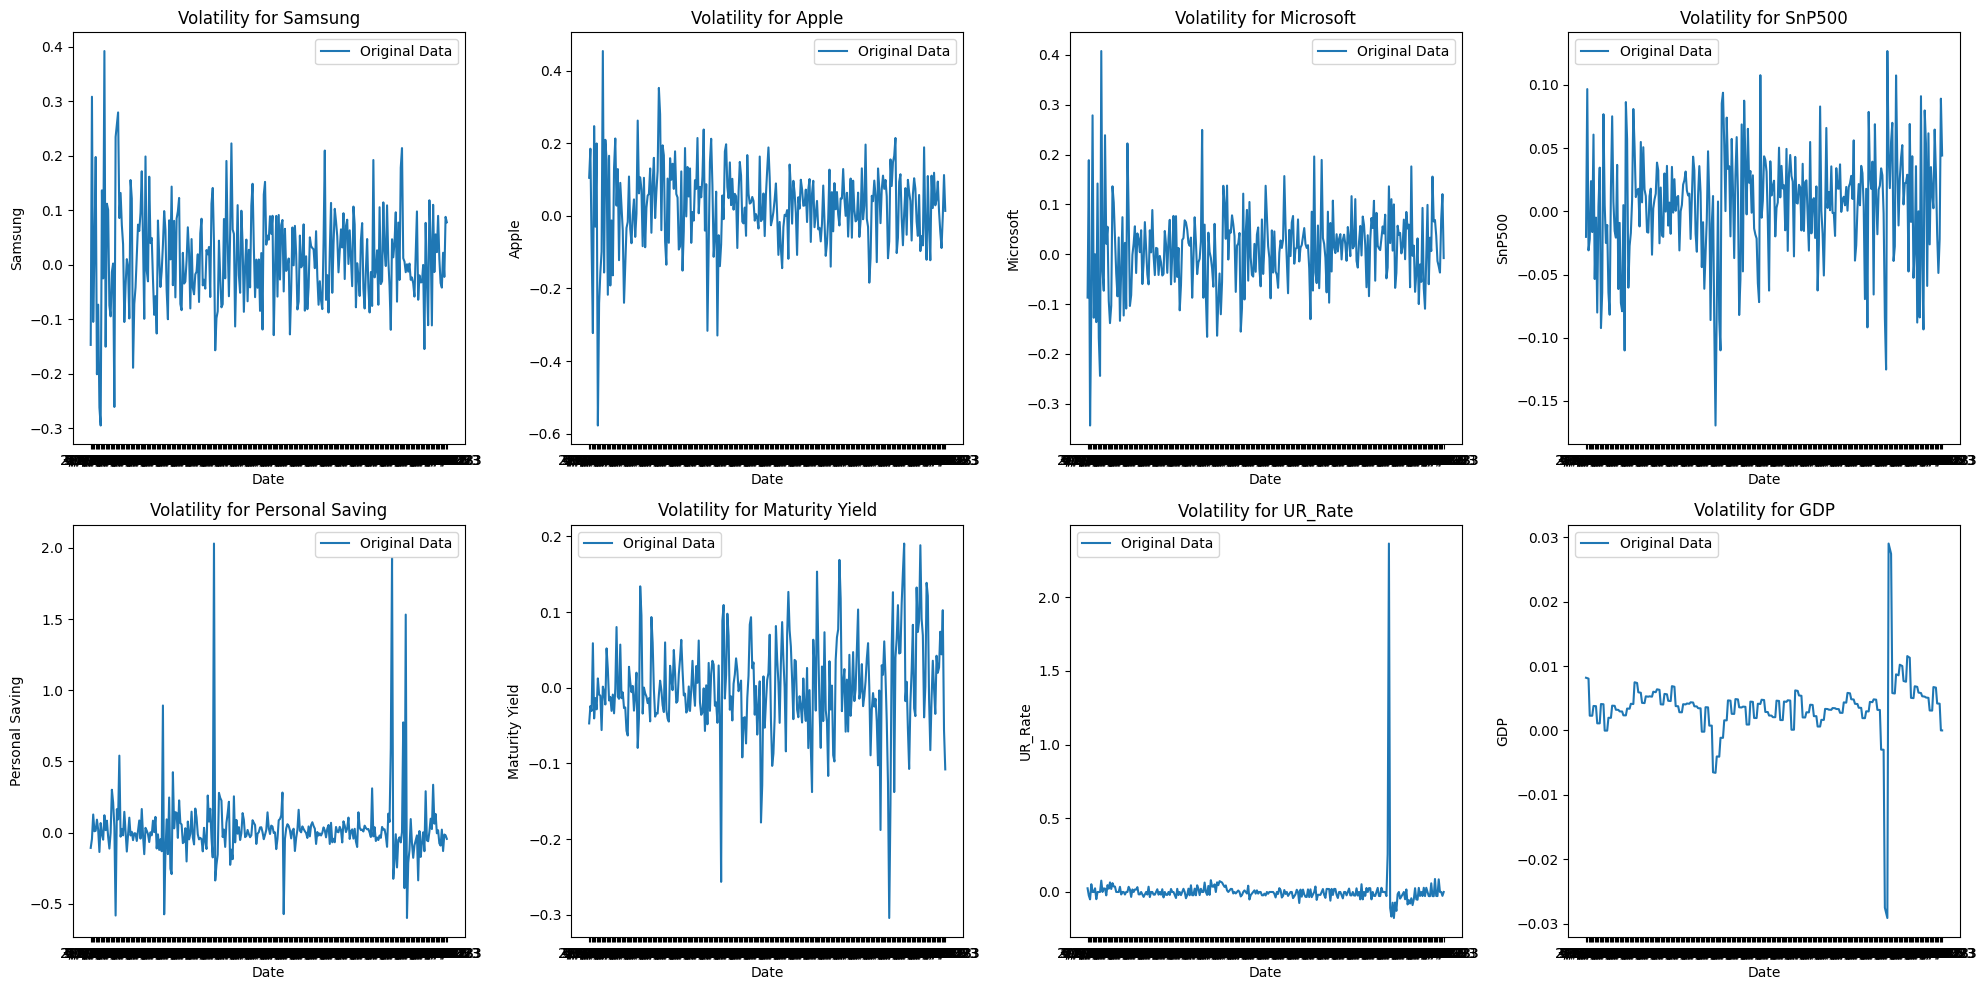

In [124]:
num_columns = len(df.columns)
num_plots_per_row = 4
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.lineplot(ax=axes[i], x=df.index, y=df[column], label='Original Data')
    axes[i].set_title(f'Volatility for {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

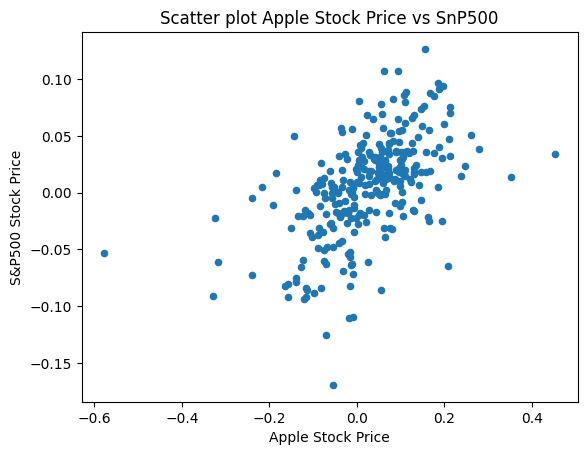

In [118]:
scatt = df.plot.scatter(
    x = 'Apple',
    y = 'SnP500',
    title = 'Scatter plot Apple Stock Price vs SnP500'
)
scatt.set(xlabel="Apple Stock Price", ylabel="S&P500 Stock Price")
plt.show()

In [119]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r"$\rho$ = " + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

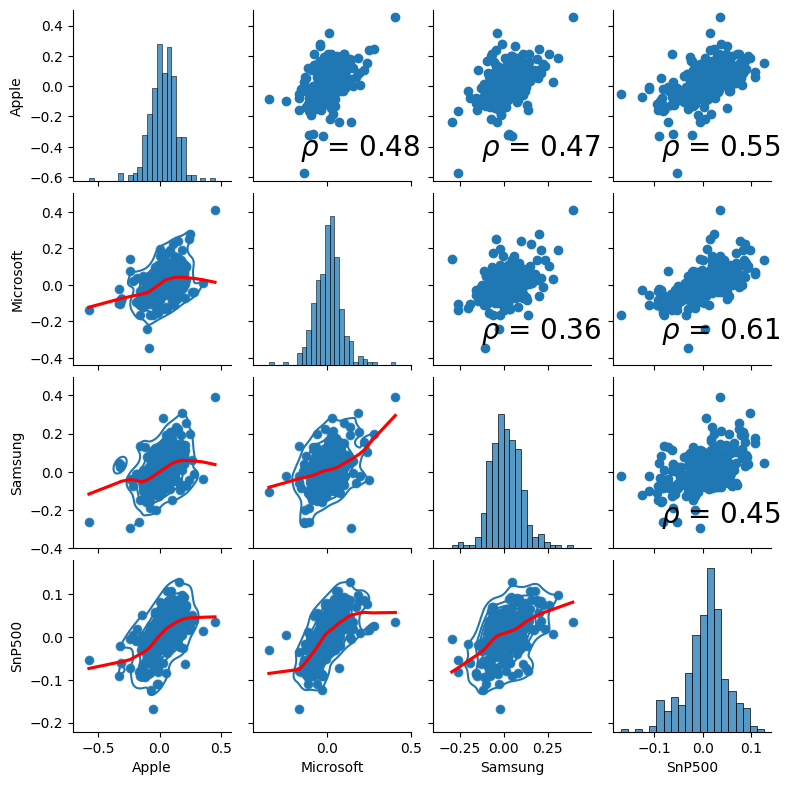

In [120]:
grid = sns.pairplot(df, vars = ['Apple', 'Microsoft', 'Samsung', 'SnP500'], height=2)
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

In [121]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

result = smf.ols(
    "Apple ~ Samsung + Microsoft + SnP500", data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Apple   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     58.72
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.53e-29
Time:                        20:11:19   Log-Likelihood:                 290.31
No. Observations:                 287   AIC:                            -572.6
Df Residuals:                     283   BIC:                            -558.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0143      0.005      2.703      0.007       0.004       0.025
Samsung        0.3174      0.065      4.856      0.000       0.189       0.446
Microsoft      0.2792      0.082      3.396      0.001       0.117       0.441
SnP500         0.7766      0.156      4.975      0.000       0.469       1.084
==============================================================================
Omnibus:                       32.613   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.085
Skew:                          -0.407   Prob(JB):                     7.56e-25
Kurtosis:                       5.937   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.978 indicates that approximately 97.8% of the variance in the Apple stock price can be explained by the combined effects of Samsung, Microsoft, and SnP500 stock prices. This high R-squared value suggests that the model fits the data very well and that the independent variables are strong predictors of the dependent variable.

The Adjusted R-squared of 0.977 adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure of model performance when multiple variables are involved. A value of 0.977 indicates that, even after accounting for the number of predictors, the model still explains a very high proportion of the variance in the Apple stock price.

The F-statistic of 4130.0 is a measure of the overall significance of the regression model. It tests whether at least one of the predictors is significantly related to the dependent variable. Given the very low Prob (F-statistic) of 7.56e-234, which is effectively zero, we can confidently reject the null hypothesis that all coefficients are zero. This strongly suggests that the model is statistically significant and that the predictors collectively have a significant impact on the Apple stock price.

$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$

Adjusted $\bar{R}^2 = 1 - \left( \frac{\text{SS}_{\text{res}} / (n - k - 1)}{\text{SS}_{\text{tot}} / (n - 1)} \right)$

Samsung: The coefficient for Samsung is 
0.5066, with a standard error of 
0.104. The 
t-value is 
4.877 and the 
p-value is 
0.000, indicating that the coefficient for Samsung is statistically significant. The 95% confidence interval for the Samsung coefficient ranges from 
0.302 to 
0.711, suggesting a positive and significant effect on the Apple stock price.

Microsoft: The coefficient for Microsoft is 
0.4908, with a standard error of 
0.018. The 
t-value is 
27.683 and the 
p-value is 
0.000, signifying a highly significant effect. The 95% confidence interval for the Microsoft coefficient ranges from 
0.456 to 
0.526, reflecting a strong and positive influence on the Apple stock price.

SnP500: The coefficient for SnP500 is 
−0.0005, with a standard error of 
0.002. The 
t-value is 
−0.236 and the 
p-value is 
0.813, suggesting that the effect of SnP500 on the Apple stock price is not statistically significant. The 95% confidence interval for the SnP500 coefficient is from 
−0.005 to 
0.004, indicating that the SnP500 variable does not have a significant impact on the Apple stock price in this model.

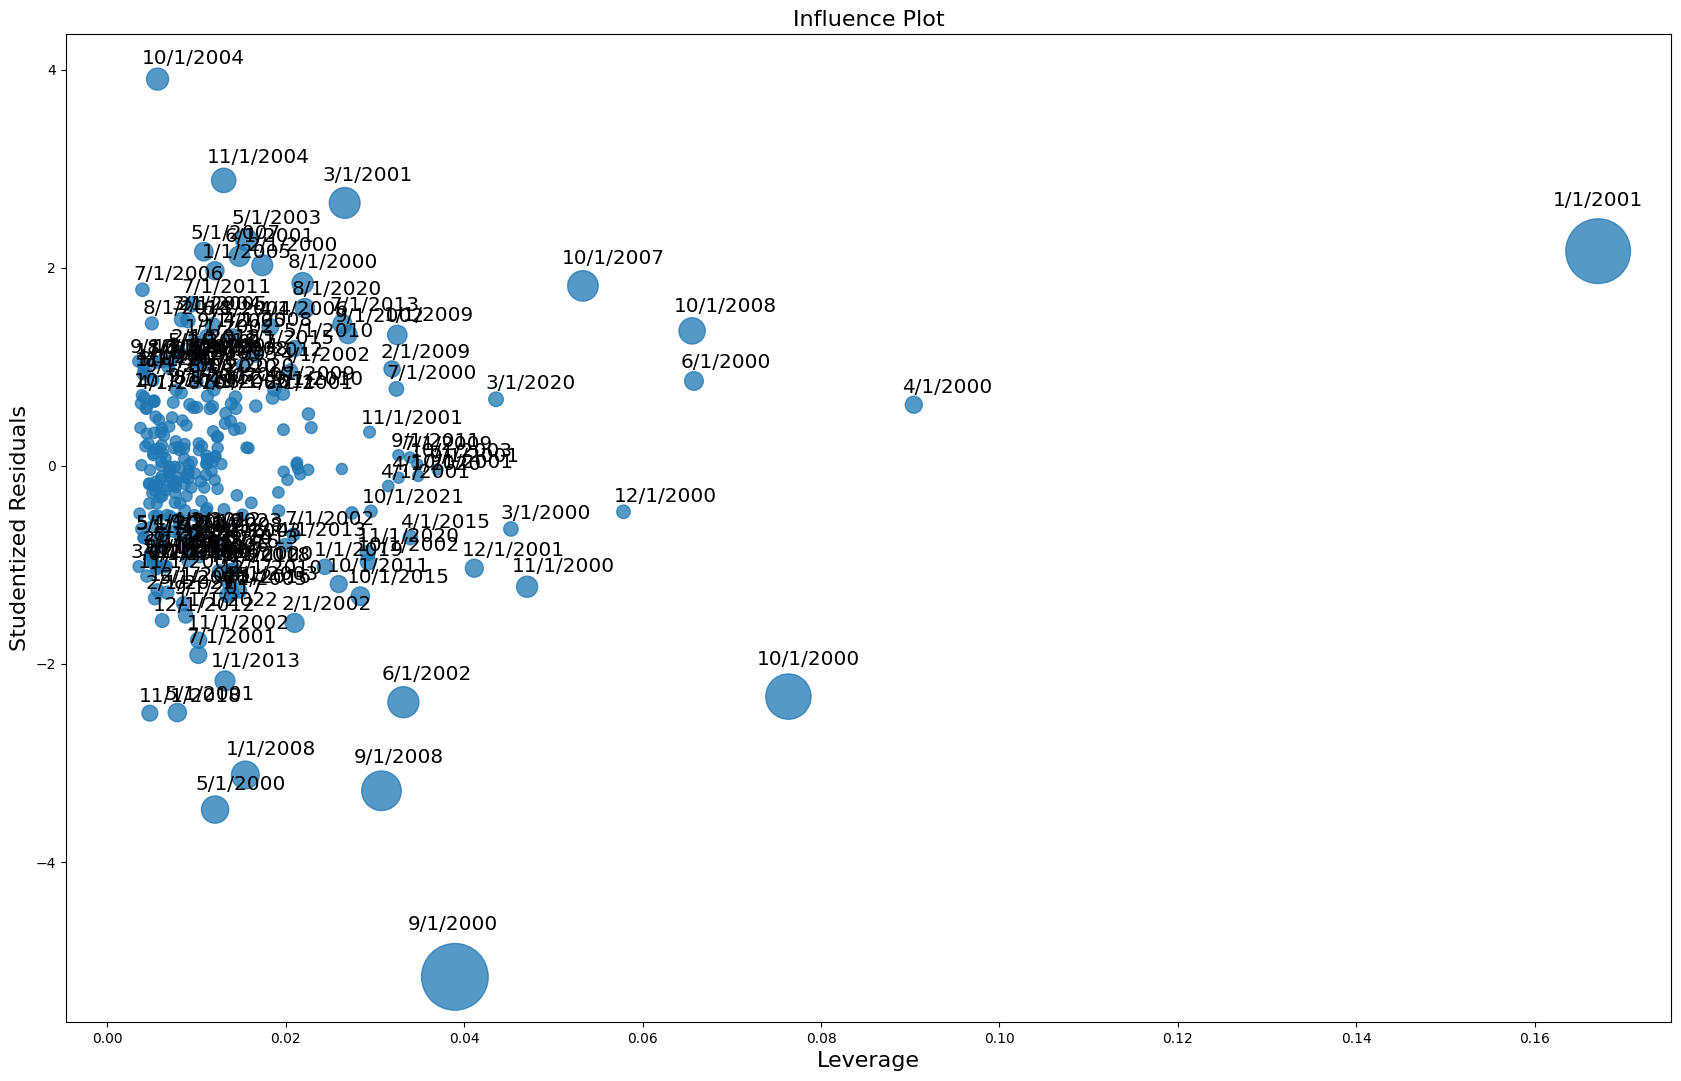

In [122]:
fig = sm.graphics.influence_plot(result, criterion='cook', alpha=0.5)
fig.set_size_inches(18, 12)
fig.tight_layout(pad=5.0)
plt.show()

In [123]:
influence = result.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(30)

,dfb_Intercept,dfb_Samsung,dfb_Microsoft,dfb_SnP500,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
Date,,,,,,,,,,
9/1/2000,-0.457293,0.810938,0.299780,-0.175175,0.247442,-4.941109,0.038961,-0.994872,-5.159967,-1.038938
1/1/2001,0.023156,0.524970,0.733376,-0.557392,0.232568,2.153381,0.167095,0.964506,2.167403,0.970787
10/1/2000,-0.175601,0.570335,-0.382939,0.029151,0.110484,-2.312353,0.076342,-0.664783,-2.330384,-0.669966
9/1/2008,-0.203405,-0.267037,-0.193773,0.534527,0.082498,-3.225855,0.030737,-0.574449,-3.281039,-0.584276
6/1/2002,-0.147663,0.003062,-0.333385,0.381105,0.048108,-2.367462,0.033193,-0.438669,-2.387031,-0.442295
3/1/2001,0.156818,0.324917,-0.054170,-0.279600,0.047138,2.626117,0.026613,0.434224,2.654011,0.438837
10/1/2007,0.091071,-0.135371,0.406471,-0.166671,0.046092,1.809383,0.053313,0.429383,1.816722,0.431125
1/1/2008,-0.202068,-0.194545,0.083651,0.234939,0.037163,-3.074913,0.015479,-0.385555,-3.122073,-0.391468
5/1/2000,-0.224755,-0.130305,0.281748,-0.018988,0.035479,-3.405418,0.012089,-0.376716,-3.471264,-0.384000
